In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the pseudobulk lung dataset
2. Filter out only the types of cancer we want
3. Normalise, calculate PCA and UMAP
4. Visualise UMAP for presentation

In [2]:
adata = sc.read_h5ad("/home/patskanivan/scripts/Lung_pseudobulk_data.h5ad")

In [3]:
adata.obs

,Celltype,dataset,cnv_status
BRONCHO_11_LUAD_metastasis,LUAD_metastasis,lu_adc_GSE131907,tumor
BRONCHO_58_LUAD_primary,LUAD_primary,lu_adc_GSE131907,tumor
Banovich_Kropski_2020_AT1,AT1,Lung_normal_new,normal
Banovich_Kropski_2020_AT2,AT2,Lung_normal_new,normal
Banovich_Kropski_2020_ciliated columnar cell of tracheobronchial tree,ciliated columnar cell of tracheobronchial tree,Lung_normal_new,normal
...,...,...,...
pan_blueprint_lung_BT1297_LUAD_primary,LUAD_primary,lu_nsclc_pan_blueprint_lung,tumor
pan_blueprint_lung_BT1298_Large cell carcinoma,Large cell carcinoma,lu_nsclc_pan_blueprint_lung,tumor
pan_blueprint_lung_BT1299_Large cell carcinoma,Large cell carcinoma,lu_nsclc_pan_blueprint_lung,tumor
pan_blueprint_lung_BT1300_Large cell carcinoma,Large cell carcinoma,lu_nsclc_pan_blueprint_lung,tumor


In [ ]:
print(adata.obs["Celltype"].unique())

# Rename 'LUAD metastasis' and 'LUAD primary' -> 'LUAD'
adata.obs["Celltype"] = adata.obs["Celltype"].replace({
    "LUAD_metastasis": "LUAD",
    "LUAD_primary": "LUAD"
})

print(adata.obs["Celltype"].unique())

['LUAD_metastasis', 'LUAD_primary', 'AT1', 'AT2', 'ciliated columnar cell of tracheobronchial tree', ..., 'bronchial goblet cell', 'SCLC-A', 'SCLC-N', 'Large cell carcinoma', 'lung neuroendocrine cell']
Length: 26
Categories (26, object): ['AT1', 'AT2', 'LUAD_metastasis', 'LUAD_primary', ..., 'respiratory hillock cell', 'serous secreting cell', 'tracheobronchial goblet cell', 'tracheobronchial serous cell']
['LUAD', 'AT1', 'AT2', 'ciliated columnar cell of tracheobronchial tree', 'club cell', ..., 'bronchial goblet cell', 'SCLC-A', 'SCLC-N', 'Large cell carcinoma', 'lung neuroendocrine cell']
Length: 25
Categories (25, object): ['AT1', 'AT2', 'LUAD', 'LUSC', ..., 'respiratory hillock cell', 'serous secreting cell', 'tracheobronchial goblet cell', 'tracheobronchial serous cell']


/tmp/ipykernel_289004/2134315876.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["Celltype"] = adata.obs["Celltype"].replace({


In [ ]:
cell_types_to_keep = [
    "LUAD", 
    "SCLC-N", 
    "SCLC-A", 
    "LUSC", 
    "Large cell carcinoma",
    "respiratory basal cell",
    "epithelial cell of alveolus of Lung",
    "multi-ciliated epithelial cell",
    "lung neuroendocrine cell",
    "respiratory hillock cell",
    "epithelial cell of lower respiratory tract",
    "nasal mucosa goblet cell"
]

adata_filtered = adata[adata.obs["Celltype"].isin(cell_types_to_keep)].copy()
print(f"Filtered dataset shape: {adata_filtered.shape}")
print(adata_filtered.obs["Celltype"].value_counts())

Filtered dataset shape: (113, 7000)
Celltype
LUAD                                          57
LUSC                                          15
SCLC-A                                        10
respiratory basal cell                         7
multi-ciliated epithelial cell                 5
epithelial cell of lower respiratory tract     5
nasal mucosa goblet cell                       4
Large cell carcinoma                           3
SCLC-N                                         3
respiratory hillock cell                       3
lung neuroendocrine cell                       1
Name: count, dtype: int64


In [ ]:
sc.pp.normalize_total(adata_filtered, target_sum=1e4)
sc.pp.log1p(adata_filtered)

In [ ]:
sc.tl.pca(adata_filtered)

sc.pp.neighbors(adata_filtered, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata_filtered)
sc.tl.leiden(adata_filtered)

2025-05-10 18:46:20.503982: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-10 18:46:20.522444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746877580.543819  289004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746877580.550350  289004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-10 18:46:20.573554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

<Figure size 1600x800 with 0 Axes>

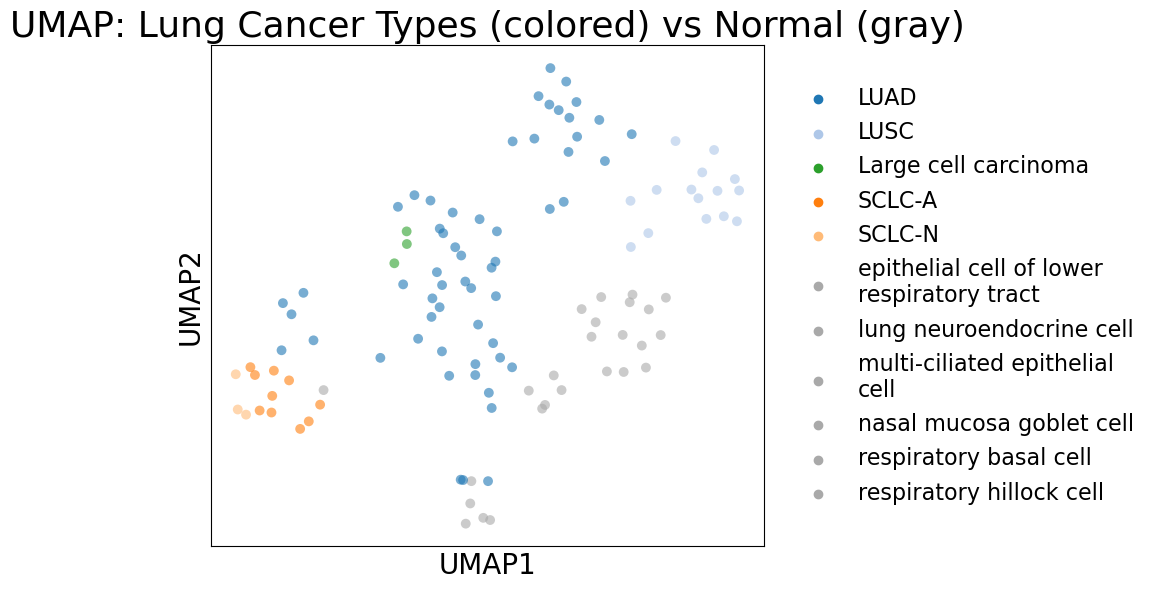

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import textwrap

rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 16,
})

tumor_types = ["LUAD", "SCLC-N", "SCLC-A", "LUSC", "Large cell carcinoma"]

unique_annotations = adata_filtered.obs['Celltype'].unique()
palette = {}
color_idx = 0

for ann in unique_annotations:
    if ann in tumor_types:
        palette[ann] = plt.cm.tab20(color_idx % 20)
        color_idx += 1
    else:
        palette[ann] = 'darkgray'

# === UMAP ===
plt.figure(figsize=(16, 8))  # шире
ax = sc.pl.umap(
    adata_filtered,
    color="Celltype",
    palette=palette,
    title='UMAP: Lung Cancer Types (colored) vs Normal (gray)',
    show=False,
    size=200,
    alpha=0.6
)

ax.set_title(ax.get_title(), fontsize=26)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)

handles, labels = ax.get_legend_handles_labels()
for i, txt in enumerate(labels):
    labels[i] = textwrap.fill(txt, 25)
leg = ax.legend(handles, labels, title="", fontsize=16, title_fontsize=16,
                loc='center left', bbox_to_anchor=(1.02, 0.5))
leg.get_frame().set_linewidth(0)  # убираем рамку

plt.tight_layout()
plt.show()



<Figure size 800x600 with 0 Axes>

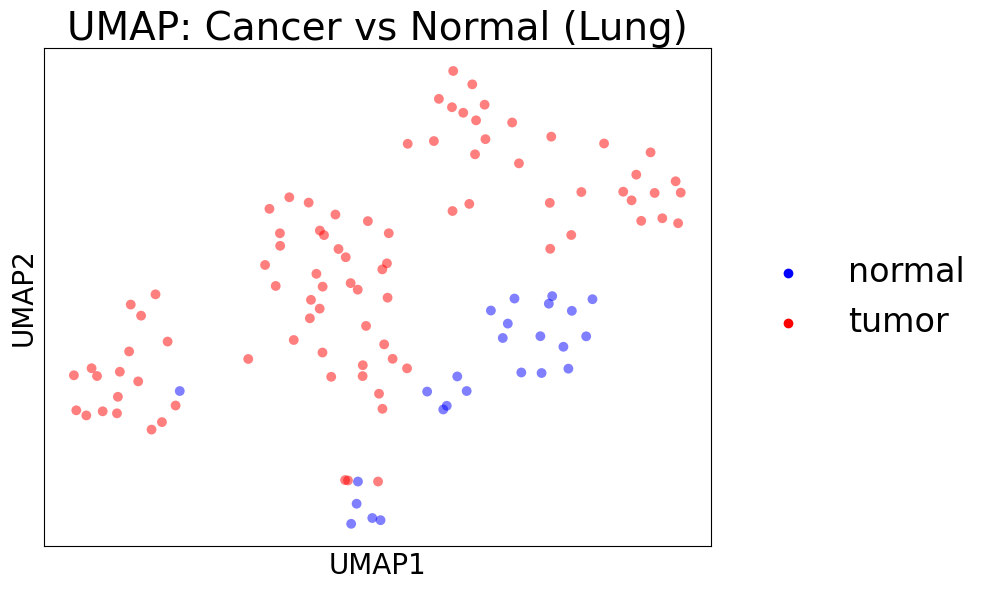

In [ ]:
adata_filtered.obs['Tumor_Normal'] = adata_filtered.obs['Celltype'].apply(
    lambda x: 'tumor' if x in tumor_types else 'normal'
)

tumor_normal_palette = {
    "tumor": "red",
    "normal": "blue"
}

plt.figure(figsize=(8, 6))
ax = sc.pl.umap(
    adata_filtered,
    color="Tumor_Normal",
    palette=tumor_normal_palette,
    title='UMAP: Cancer vs Normal (Lung)',
    show=False,
    size=200,
    alpha=0.5
)

ax.set_title(ax.get_title(), fontsize=28)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)

handles, labels = ax.get_legend_handles_labels()
for i, txt in enumerate(labels):
    labels[i] = textwrap.fill(txt, 20)
leg = ax.legend(handles, labels, title="", fontsize=24, title_fontsize=16,
                loc='center left', bbox_to_anchor=(1.02, 0.5))
leg.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()
